In [1]:
#include "TdrStyle.C"

In [2]:
// files information
TString pathData = "/home/choij/Desktop/CMS/plotMaker/FakeEstimator/2016/RunSysts__/DATA/FakeEstimator_DoubleEG_2016.root";
TString pathMC = "/home/choij/Desktop/CMS/plotMaker/FakeEstimator/2016/RunSysts__/FakeEstimator_MC.root";

TFile* f_data = new TFile(pathData); TFile* f_mc = new TFile(pathMC);

vector<TString> WPs = {"Loose", "Tight"};
vector<TString> Systs = {"Central", "Syst_FlavorDependence", "Syst_JetPtCutDown", "Syst_JetPtCutUp"};

vector<TString> Hists = {
    "M(ee)_Z_enriched", "Mt_W_enriched", "corrPt_QCD_enriched",
    "electron_eta_QCD_enriched", "electron_eta_W_enriched", "electron_pt_W_enriched",
    "leading_electron_eta_Z_enriched", "leading_electron_pt_Z_enriched", "leading_jet_eta_QCD_enriched",
    "leading_jet_eta_W_enriched", "leading_jet_eta_Z_enriched", "leading_jet_pt_QCD_enriched",
    "leading_jet_pt_W_enriched", "leading_jet_pt_Z_enriched", "subleading_electron_eta_Z_enriched",
    "subleading_electron_pt_Z_enriched", "subleading_jet_eta_QCD_enriched", "subleading_jet_pt_QCD_enriched",
    "nEvent_QCD_enriched_pass"
};

In [3]:
// function to get a directory
TDirectory* GetDirectory(bool isData, TString wp, TString syst) {
    TDirectory* temp_dir = NULL;
    
    if (isData == true) {
        temp_dir = (TDirectory*)f_data->GetDirectory(wp + "_" + syst);
    }
    else {
        temp_dir = (TDirectory*)f_mc->GetDirectory(wp + "_" + syst);
    }
    
    return temp_dir;
}

In [4]:
// function to get a histogram
auto GetHistogram(TDirectory* dir, TString histname) {
    auto* hist = dir->Get(histname);
    return hist;
}

In [5]:
// function to get a scale factor
Double_t GetScale(TString wp, TString syst) {
    TDirectory* dir_data = GetDirectory(1, wp, syst); TDirectory* dir_mc = GetDirectory(0, wp, syst);
    
    TH1D* h_data = (TH1D*) dir_data->Get("Mt_W_enriched_" + wp + "_" + syst);
    TH1D* h_mc = (TH1D*) dir_mc->Get("Mt_W_enriched_" + wp + "_" + syst);
    
    Double_t scale = h_data->Integral() / h_mc->Integral();
    
    return scale;
}

In [6]:
TCanvas* cvs = new TCanvas("cvs", "cvs", 800, 600);
TPad* pad_up = new TPad("pad_up", "pad_up", 0, 0.25, 1, 1);
TPad* pad_down = new TPad("pad_down", "pad_down", 0, 0, 1, 0.25);

TDirectory* dir_data = (TDirectory*) GetDirectory(1, "Tight", "Central");
TDirectory* dir_mc = (TDirectory*) GetDirectory(0, "Tight", "Central");

TH1D* h_data = (TH1D*) GetHistogram(dir_data, Hists.at(11) + "_Tight_Central" );
TH1D* h_mc = (TH1D*) GetHistogram(dir_mc, Hists.at(11) + "_Tight_Central");

Double_t scale = GetScale("Tight", "Central");
h_mc->Scale(scale);

h_data->GetYaxis()->SetRangeUser(0, 3000);
h_mc->GetYaxis()->SetRangeUser(0, 3000);

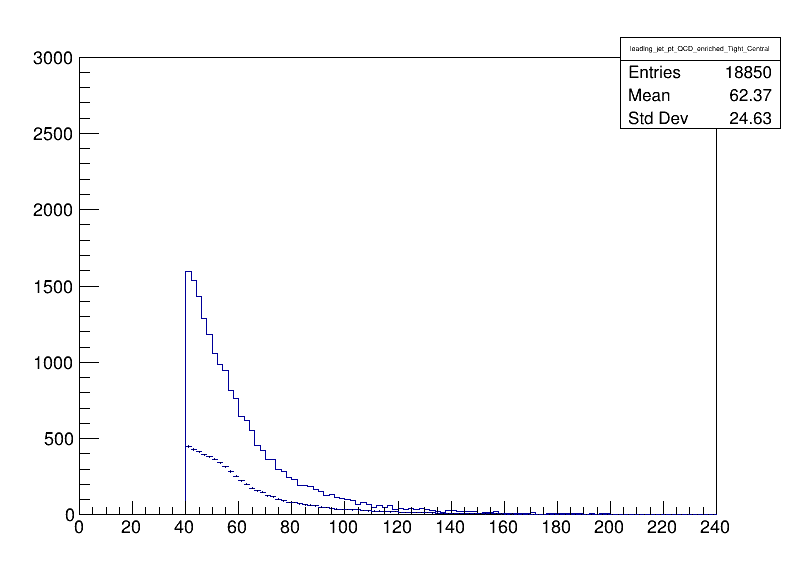

In [7]:
cvs->cd();
h_data->Draw();
h_mc->Draw("same");
cvs->Draw();